<a href="https://colab.research.google.com/github/shriyamuthyala/project-1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring Drowsiness Patterns in Wearable Device Data
Columns:
1. heartRate: Heart rate readings from the smartwatch sensors.

2. ppgGreen, ppgRed, ppgIR: PPG (Photoplethysmography) sensor readings in green,
red, and infrared wavelengths respectively.

3. drowsiness: Label indicating the level of drowsiness based on an adapted Karolinska
Sleepiness Scale (KSS). Values range from 0.0 to 2.0, where 0.0 represents
alertness and 2.0 represents significant drowsiness.

Dataset link: https://www.kaggle.com/datasets/vitoraugustx/drowsiness-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drowsiness_dataset.csv')
data.head()

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
0,54.0,1584091.0,5970731.0,6388383.0,0.0
1,54.0,1584091.0,5971202.0,6392174.0,0.0
2,54.0,1581111.0,5971295.0,6391469.0,0.0
3,54.0,1579343.0,5972599.0,6396137.0,0.0
4,54.0,1579321.0,5971906.0,6392898.0,0.0


In [ ]:
#get information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   heartRate   float64
 1   ppgGreen    float64
 2   ppgRed      float64
 3   ppgIR       float64
 4   drowsiness  float64
dtypes: float64(5)
memory usage: 186.5 MB


In [ ]:
data.describe()

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
count,133470.000000,1.334700e+05,1.334700e+05,1.334700e+05,133469.0
mean,95.051779,2.186839e+06,5.963399e+06,5.911218e+06,0.0
std,8.723828,4.253020e+05,4.382076e+05,3.316375e+05,0.0
min,54.000000,1.164463e+06,4.523043e+06,4.822322e+06,0.0
25%,90.000000,1.830183e+06,5.750228e+06,5.781296e+06,0.0
50%,95.000000,2.258518e+06,6.014628e+06,5.934423e+06,0.0
75%,100.000000,2.526319e+06,6.212099e+06,6.052736e+06,0.0
max,119.000000,3.290518e+06,6.842637e+06,7.060806e+06,0.0


In [ ]:
#checking missing values
data.isnull().sum()

,0
heartRate,0
ppgGreen,0
ppgRed,0
ppgIR,0
drowsiness,0


In [ ]:
# Imputation using the median:
data['drowsiness'].fillna(data['drowsiness'].median(), inplace=True)

In [ ]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   heartRate   float64
 1   ppgGreen    float64
 2   ppgRed      float64
 3   ppgIR       float64
 4   drowsiness  float64
dtypes: float64(5)
memory usage: 186.5 MB


,0
heartRate,0
ppgGreen,0
ppgRed,0
ppgIR,0
drowsiness,0


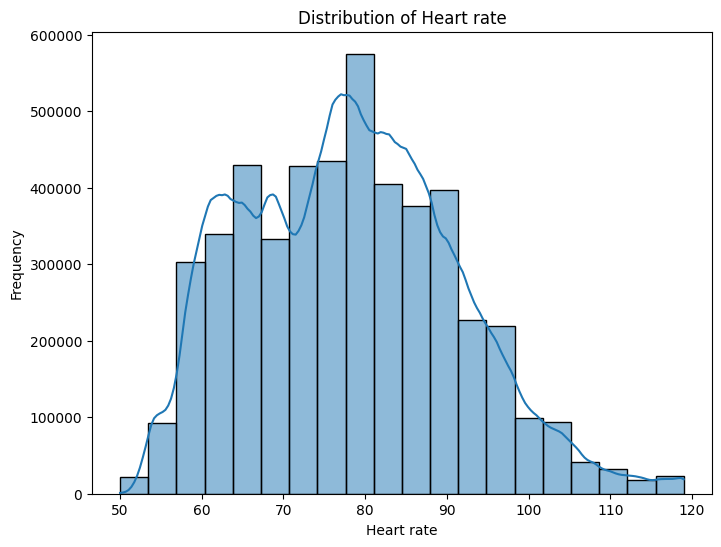

In [ ]:
#Histogram of heartrate
plt.figure(figsize=(8,6))
sns.histplot(data['heartRate'],bins=20,kde=True)
plt.title('Distribution of Heart rate')
plt.xlabel('Heart rate')
plt.ylabel('Frequency')
plt.show()

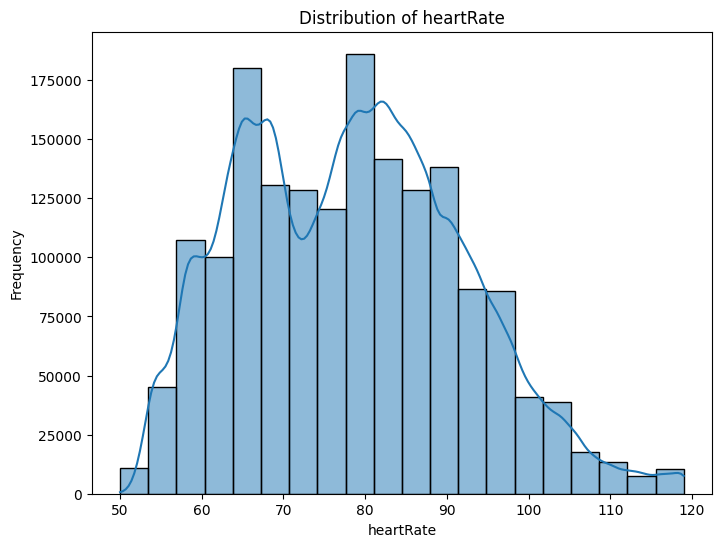

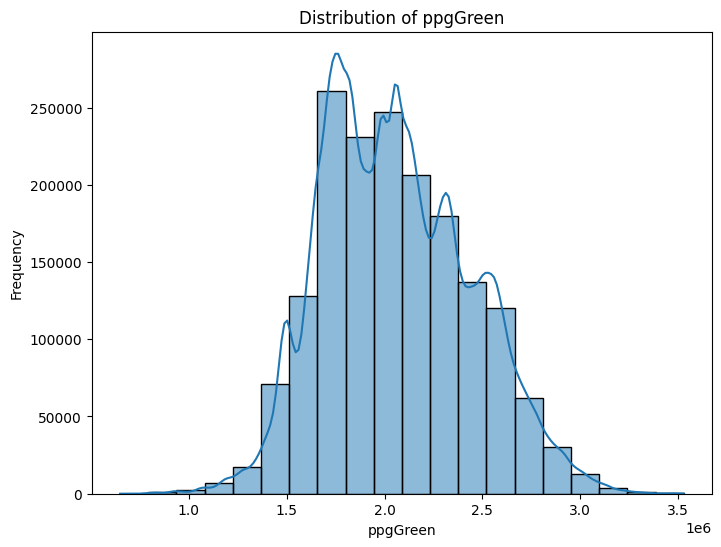

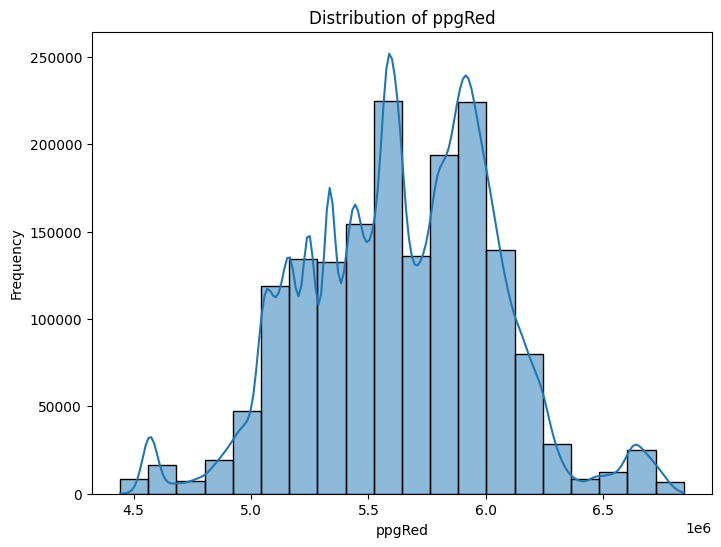

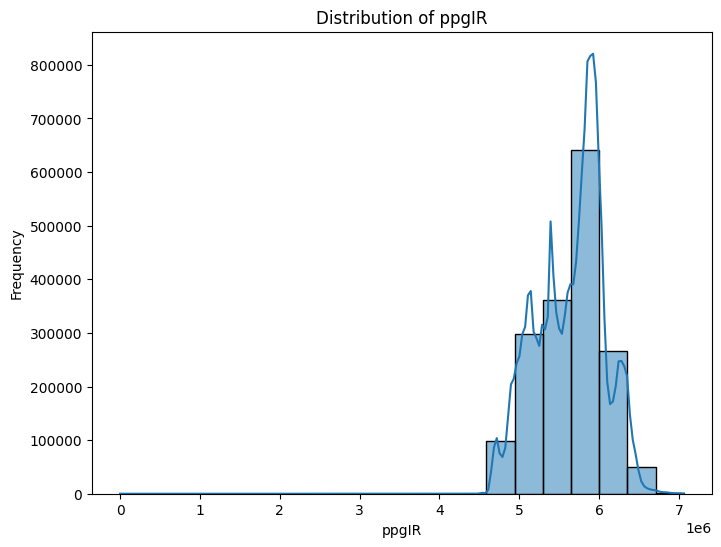

In [ ]:
for column in ['heartRate','ppgGreen','ppgRed','ppgIR']:
    plt.figure(figsize=(8,6)) # Create a new figure for each plot
    sns.histplot(data[column], bins=20, kde=True)  # Use sns.histplot with kde
    plt.title(f'Distribution of {column}') # Set title dynamically
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#Summary statistics
data.groupby('drowsiness')[['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR']].agg(['mean', 'std', 'min', 'max'])


heartRate                              ppgGreen                 \
                 mean        std   min    max          mean            std   
drowsiness                                                                   
0.0         86.118218  11.043586  53.0  119.0  1.998717e+06  397460.640997   
1.0         79.817474   8.779762  50.0  116.0  2.160250e+06  507568.426553   
2.0         64.681390   6.791353  50.0  110.0  2.101198e+06  417292.014555   

                                       ppgRed                            \
                 min        max          mean            std        min   
drowsiness                                                                
0.0         589775.0  3530671.0  5.799788e+06  358897.251053  4470521.0   
1.0         589969.0  3530798.0  5.618292e+06  412224.832792  4442381.0   
2.0         589758.0  3529995.0  5.436227e+06  303707.273446  4441989.0   

                              ppgIR                                       
                  max          mean            std        min        max  
drowsiness                                                                
0.0         6842637.0  5.886286e+06  296717.125288  4617461.0  7061799.0  
1.0         6842627.0  5.775197e+06  455042.230910  4585215.0  7061687.0  
2.0         6768753.0  5.448053e+06  439913.474166  4409976.0  7061582.0

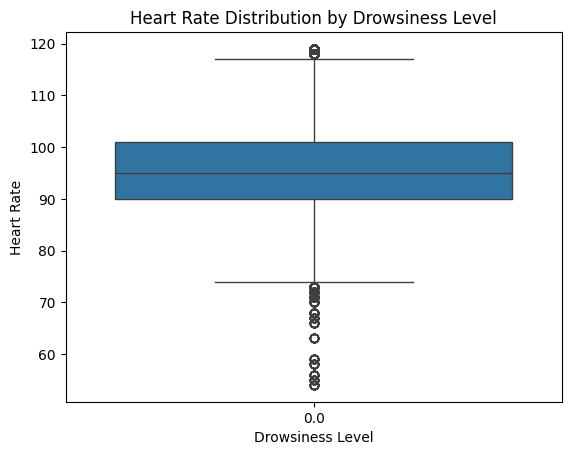

In [ ]:
#Boxplots
sns.boxplot(data=data, x='drowsiness', y='heartRate')
plt.title('Heart Rate Distribution by Drowsiness Level')
plt.xlabel('Drowsiness Level')
plt.ylabel('Heart Rate')
plt.show()

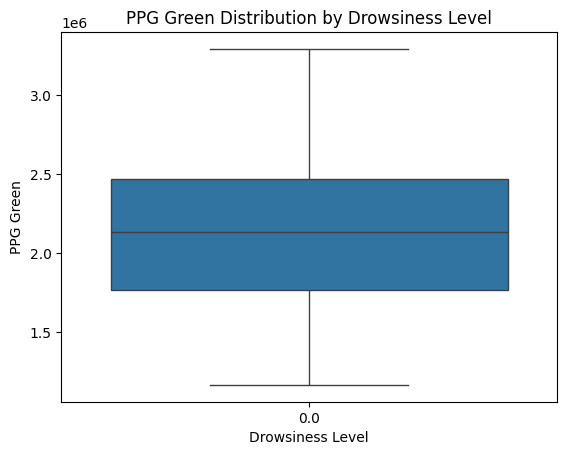

In [ ]:

sns.boxplot(data=data, x='drowsiness', y='ppgGreen')
plt.title('PPG Green Distribution by Drowsiness Level')
plt.xlabel('Drowsiness Level')
plt.ylabel('PPG Green')
plt.show()

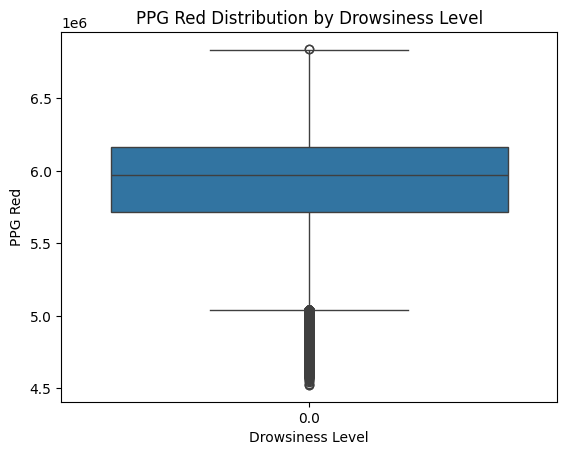

In [ ]:

sns.boxplot(data=data, x='drowsiness', y='ppgRed')
plt.title('PPG Red Distribution by Drowsiness Level')
plt.xlabel('Drowsiness Level')
plt.ylabel('PPG Red')
plt.show()

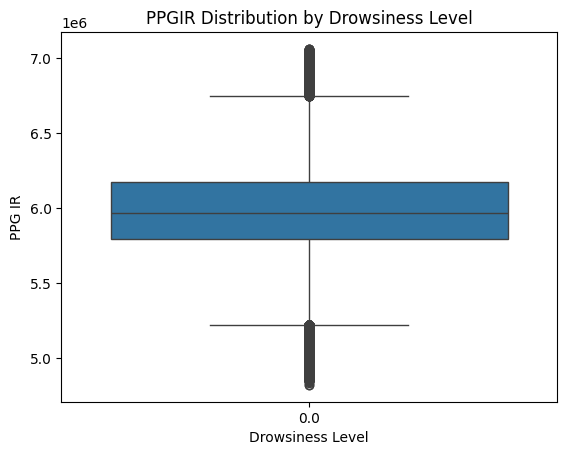

In [ ]:

sns.boxplot(data=data, x='drowsiness', y='ppgIR')
plt.title('PPGIR Distribution by Drowsiness Level')
plt.xlabel('Drowsiness Level')
plt.ylabel('PPG IR')
plt.show()

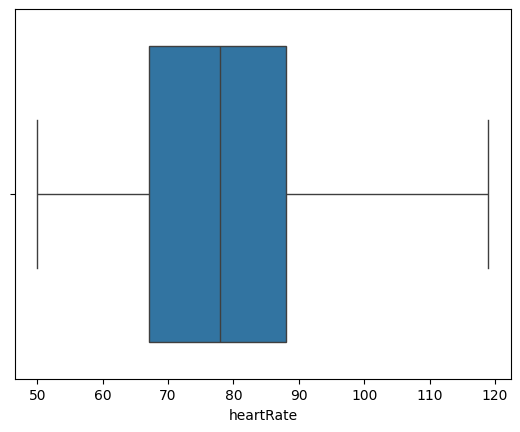

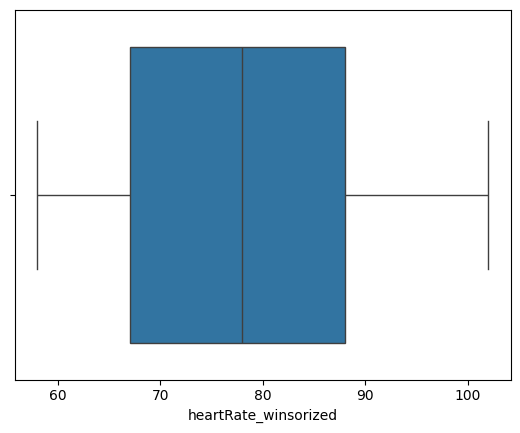

In [ ]:
# Create a box plot to identify outliers
sns.boxplot(x=data['heartRate'])
plt.show()

# Apply a handling strategy (e.g., winsorizing)
from scipy.stats.mstats import winsorize
data['heartRate_winsorized'] = winsorize(data['heartRate'], limits=[0.05, 0.05])

# Create a new box plot to see the impact
sns.boxplot(x=data['heartRate_winsorized'])
plt.show()


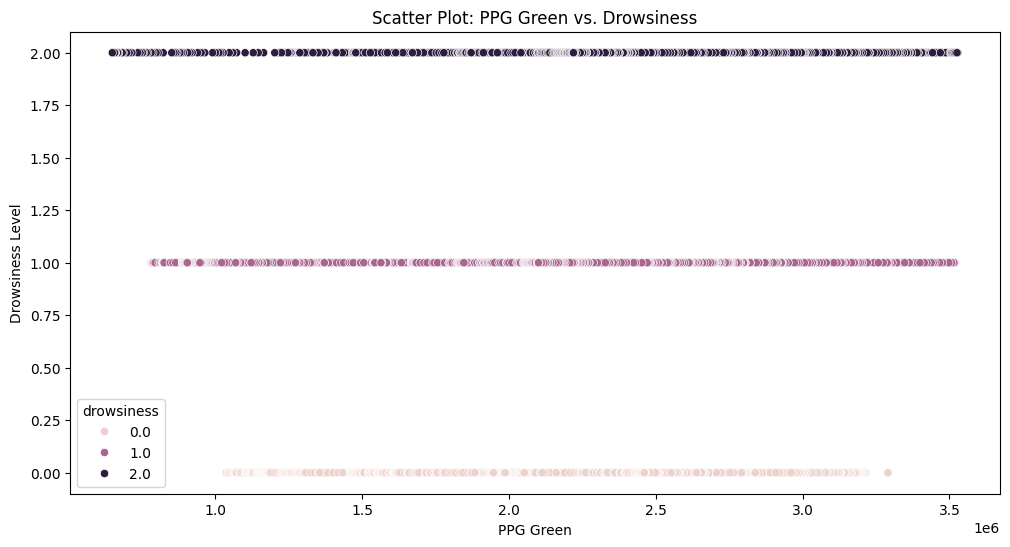

In [ ]:
#Scatterplots
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='ppgGreen', y='drowsiness', hue='drowsiness')
plt.title('Scatter Plot: PPG Green vs. Drowsiness')
plt.xlabel('PPG Green')
plt.ylabel('Drowsiness Level')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


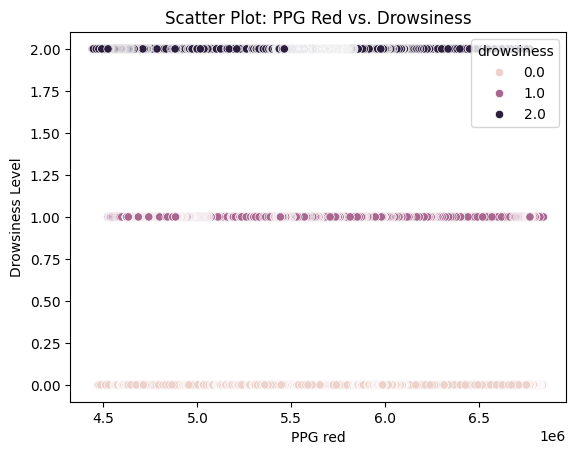

In [ ]:
sns.scatterplot(data=data, x='ppgRed', y='drowsiness', hue='drowsiness')
plt.title('Scatter Plot: PPG Red vs. Drowsiness')
plt.xlabel('PPG red')
plt.ylabel('Drowsiness Level')
plt.show()

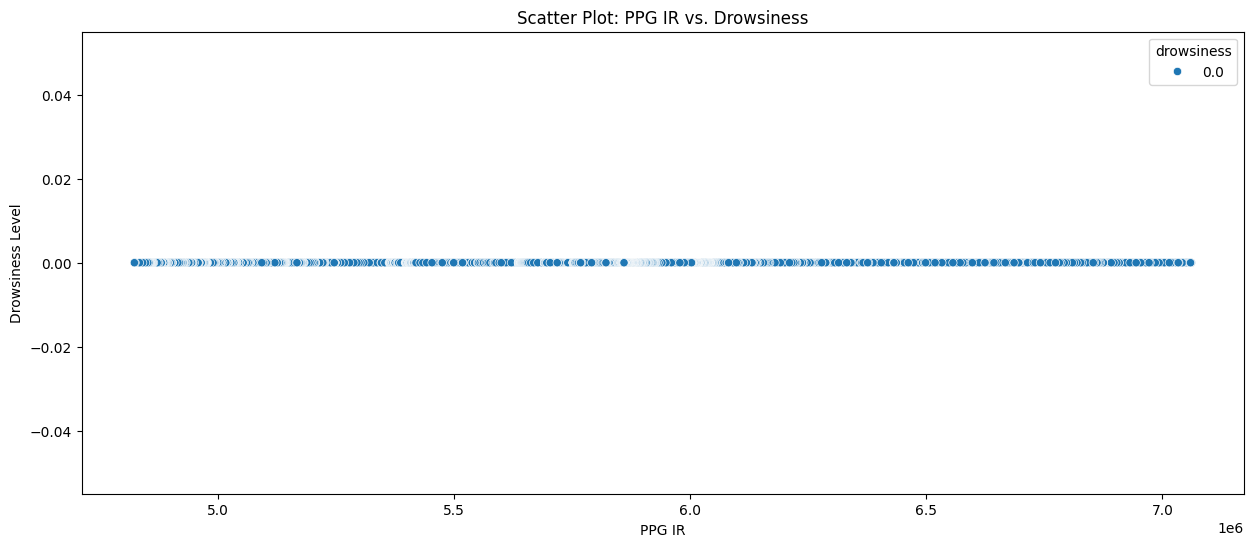

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='ppgIR', y='drowsiness', hue='drowsiness')
plt.title('Scatter Plot: PPG IR vs. Drowsiness')
plt.xlabel('PPG IR')
plt.ylabel('Drowsiness Level')
plt.show()


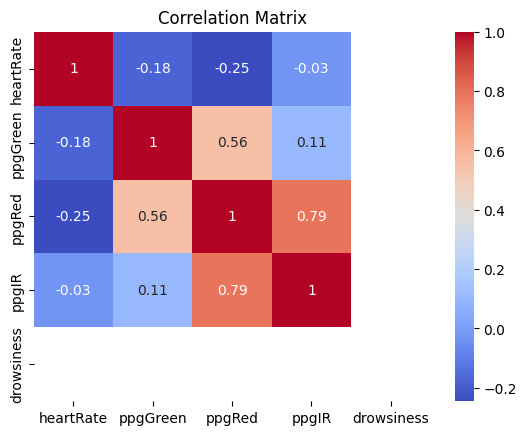

In [ ]:
# Correlation Matrix:
correlation_matrix = data[['heartRate', 'ppgGreen', 'ppgRed', 'ppgIR', 'drowsiness']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Define the number of periods
num_periods = 4

# Calculate the size of each period
period_size = len(data) // num_periods

# Create a period column
period_labels = ['Morning', 'Afternoon', 'Evening', 'Night']
data['period'] = pd.cut(data.index, bins=num_periods, labels=period_labels)
# Check the distribution of periods
print(data['period'].value_counts())

# Segment the data by period
morning_data = data[data['period'] == 'Morning']
afternoon_data = data[data['period'] == 'Afternoon']
evening_data = data[data['period'] == 'Evening']
night_data = data[data['period'] == 'Night']
data.info()

period
Morning      33368
Night        33368
Afternoon    33367
Evening      33367
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133470 entries, 0 to 133469
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   heartRate   133470 non-null  float64 
 1   ppgGreen    133470 non-null  float64 
 2   ppgRed      133470 non-null  float64 
 3   ppgIR       133470 non-null  float64 
 4   drowsiness  133470 non-null  float64 
 5   period      133470 non-null  category
dtypes: category(1), float64(5)
memory usage: 5.2 MB


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


Correlation between drowsiness and heart rate (Morning): nan
Correlation between drowsiness and PPG Green (Morning): nan
Correlation between drowsiness and PPG Red (Morning): nan
Correlation between drowsiness and PPG IR (Morning): nan


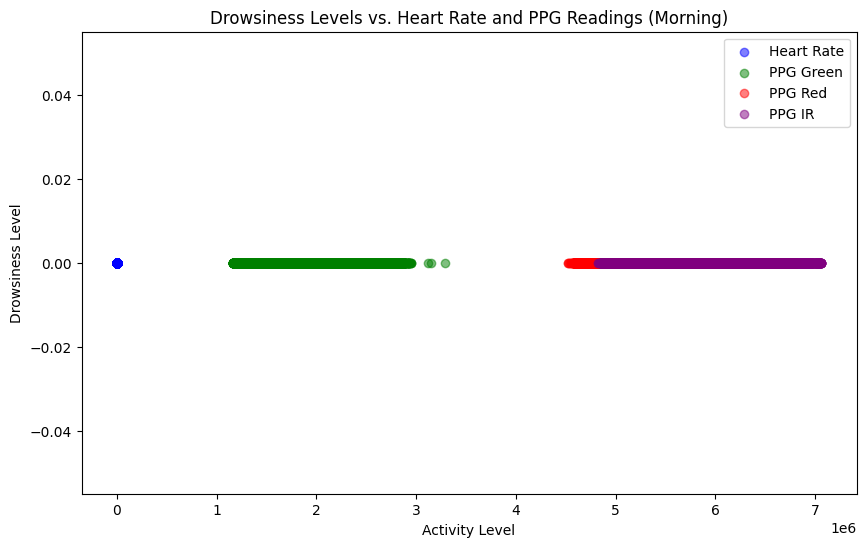

Correlation between drowsiness and heart rate (Afternoon): nan
Correlation between drowsiness and PPG Green (Afternoon): nan
Correlation between drowsiness and PPG Red (Afternoon): nan
Correlation between drowsiness and PPG IR (Afternoon): nan


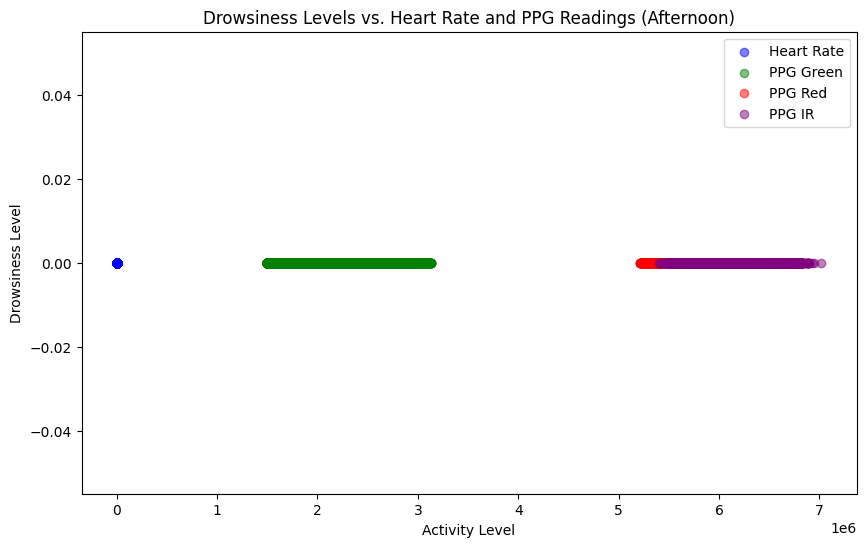

Correlation between drowsiness and heart rate (Evening): nan
Correlation between drowsiness and PPG Green (Evening): nan
Correlation between drowsiness and PPG Red (Evening): nan
Correlation between drowsiness and PPG IR (Evening): nan


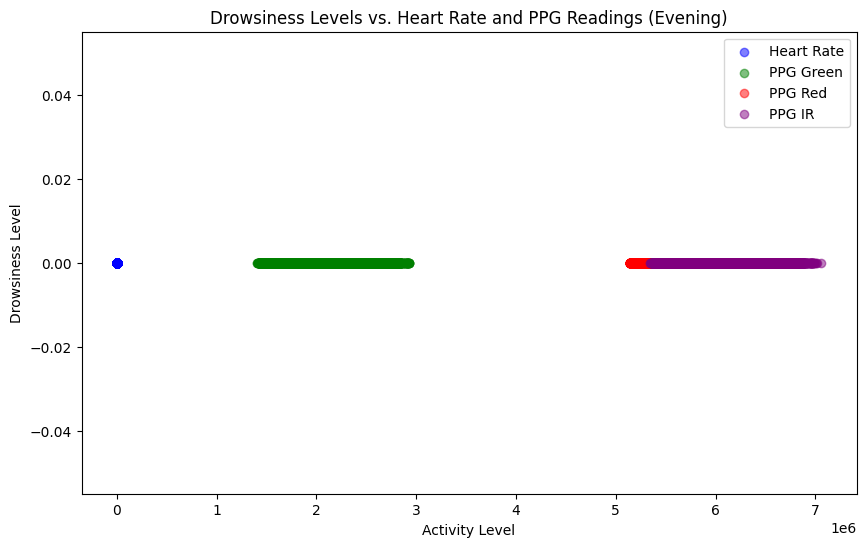

Correlation between drowsiness and heart rate (Night): nan
Correlation between drowsiness and PPG Green (Night): nan
Correlation between drowsiness and PPG Red (Night): nan
Correlation between drowsiness and PPG IR (Night): nan


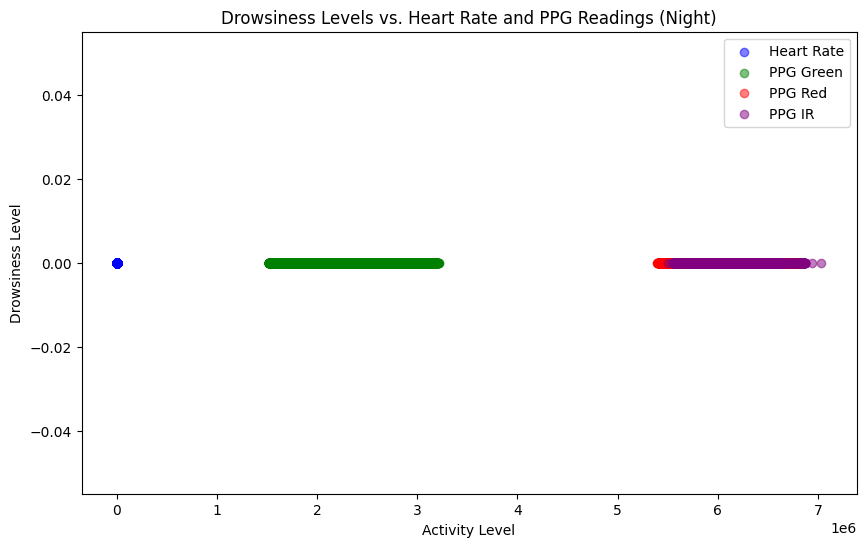

In [ ]:
def calculate_and_plot_correlations(data, period_name):
    """Calculates and plots correlations between drowsiness and other variables."""

    correlation_heart_rate = data['drowsiness'].corr(data['heartRate'], method='spearman')
    correlation_ppg_green = data['drowsiness'].corr(data['ppgGreen'])
    correlation_ppg_red = data['drowsiness'].corr(data['ppgRed'])
    correlation_ppg_ir = data['drowsiness'].corr(data['ppgIR'])

    print(f'Correlation between drowsiness and heart rate ({period_name}): {correlation_heart_rate}')
    print(f'Correlation between drowsiness and PPG Green ({period_name}): {correlation_ppg_green}')
    print(f'Correlation between drowsiness and PPG Red ({period_name}): {correlation_ppg_red}')
    print(f'Correlation between drowsiness and PPG IR ({period_name}): {correlation_ppg_ir}')

    plt.figure(figsize=(10, 6))
    plt.scatter(data['heartRate'], data['drowsiness'], alpha=0.5, label='Heart Rate', color='blue')
    plt.scatter(data['ppgGreen'], data['drowsiness'], alpha=0.5, label='PPG Green', color='green')
    plt.scatter(data['ppgRed'], data['drowsiness'], alpha=0.5, label='PPG Red', color='red')
    plt.scatter(data['ppgIR'], data['drowsiness'], alpha=0.5, label='PPG IR', color='purple')

    plt.title(f'Drowsiness Levels vs. Heart Rate and PPG Readings ({period_name})')
    plt.xlabel('Activity Level')
    plt.ylabel('Drowsiness Level')
    plt.legend()
    plt.show()

# Calculate and plot correlations for each period
calculate_and_plot_correlations(morning_data, 'Morning')
calculate_and_plot_correlations(afternoon_data, 'Afternoon')
calculate_and_plot_correlations(evening_data, 'Evening')
calculate_and_plot_correlations(night_data, 'Night')